In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

hits_id = "37i9dQZF1DXaqCgtv7ZR3L"

songstats = pd.read_csv("full_spotify_data.csv")

songstats

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [10]:
#this function selects len_out elements from source_lst at random without replacement
def random_chooser(source_lst, len_out):
    import random
    lst_out = []
    for index in range(len_out):
        temp = random.choice(source_lst)
        source_lst.remove(temp)
        lst_out.append(temp)
    return lst_out

#this function takes in the playlist_id and the out_length and returns a list of size out_length
#of all the playlist's songs stats as a dataframe. If out_length is set to "max", then the stats
#of the whole playlist is printed. Meanwhile, if a different number was used for out_length, then
#the size of the output list is capped to out_length

def playlist_scraper(parent_dataframe, playlist_id, out_length):
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials
    spotify = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id = "d8b4f03165f841108c724b8be1443973", client_secret = "c0af1b9610c1409f9136e828301cf298"))


    results = spotify.playlist_tracks(playlist_id)
    playlist = results['items']
    while results['next']:
        results = spotify.next(results)
        playlist.extend(results['items'])


    ids_lst = list(parent_dataframe.id)
    out_playlist = []
    out_playlist_stats = []

    #return playlist[0]["track"]["id"]
    #return len(playlist)
    #saving the song ids into out_playlist
    for song_index in range(len(playlist)):
        id = playlist[song_index]["track"]["id"]
        if id in list(parent_dataframe.id):
            out_playlist.append(id)

    #sampling out_length songs without replacement in the playlist
    if out_length != "max":
        out_playlist = random_chooser(out_playlist, out_length)
        
    for song_id in out_playlist:
        out_playlist_stats.append(parent_dataframe.iloc[ids_lst.index(song_id)])
    return pd.DataFrame(out_playlist_stats).reset_index()

In [11]:
hits = playlist_scraper(songstats, "37i9dQZF1DXaqCgtv7ZR3L", "max")
hits

,index,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,19410,0.6420,2019,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,89,2019-12-06,0.0559,116.971
1,19616,0.3340,2020,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,96,2020-03-20,0.0598,171.005
2,19715,0.3490,2020,0.20700,['Lil Mosey'],0.774,162547,0.554,1,22LAwLoDA5b4AaGSkg6bKW,0.000000,0,0.1320,-7.909,1,Blueberry Faygo,84,2020-02-06,0.0383,99.034
3,57352,0.5370,2020,0.06700,"['Future', 'Drake']",0.795,237918,0.574,1,1K5KBOgreBi5fkEHvg5ap3,0.000000,2,0.1500,-6.903,0,Life Is Good (feat. Drake),78,2020-05-15,0.4870,142.053
4,19409,0.5530,2019,0.19200,['Post Malone'],0.695,215280,0.762,0,21jGcNKet2qwijlDFuPiPb,0.002440,0,0.0863,-3.497,1,Circles,89,2019-09-06,0.0395,120.042
5,19423,0.4570,2019,0.05220,['Arizona Zervas'],0.621,163636,0.601,1,696DnlkuDOXcMAnKlTgXXK,0.000000,6,0.4600,-5.616,0,ROXANNE,87,2019-10-10,0.1480,116.735
6,19407,0.5570,2019,0.12200,['Harry Styles'],0.548,174000,0.816,0,6UelLqGlWMcVH1E5c4H7lY,0.000000,0,0.3350,-4.209,1,Watermelon Sugar,94,2019-12-13,0.0465,95.390
7,19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
8,75146,0.2360,2020,0.12300,['Trevor Daniel'],0.784,159382,0.430,0,2rRJrJEo19S2J82BDsQ3F7,0.000000,10,0.0887,-8.756,0,Falling,79,2020-03-26,0.0364,127.087
9,19668,0.8260,2020,0.01700,['Jack Harlow'],0.923,139741,0.604,1,1jaTQ3nqY3oAAYyCTbIvnM,0.000000,11,0.2720,-6.671,0,WHATS POPPIN,84,2020-03-13,0.2450,145.062


In [12]:
import custom_stats as stats

'''
stats.hist_grapher(hits.acousticness, 3.5, "whatev", "acousticness")
stats.hist_grapher(hits.valence, 3.5, "whatev", "valence")
stats.hist_grapher(hits.energy, 3.5, "whatev", "energy")
stats.hist_grapher(hits.danceability, 3.5, "whatev", "danceability")
stats.hist_grapher(hits.explicit, 3.5, "whatev", "explicit")
stats.hist_grapher(hits.instrumentalness, 3.5, "whatev", "instrumentalness")
stats.hist_grapher(hits.key, 3.5, "whatev", "key")
stats.hist_grapher(hits.liveness, 3.5, "whatev", "liveness")
stats.hist_grapher(hits.loudness, 3.5, "whatev", "loudness")
#stats.hist_grapher(hits.mode, 3.5, "whatev", "mode")
stats.hist_grapher(hits.popularity, 3.5, "whatev", "popularity")
stats.hist_grapher(hits.speechiness, 3.5, "whatev", "speechiness")
stats.hist_grapher(hits.tempo, 3.5, "whatev", "tempo")


low acousticness (strong skew)
#relatively high danceability
relatively high energy but mostly average (normal?)
instrumentalness almost non-existent (strong, but is that a skew?)
liveness is super low (strong skew)
loudness is pretty high (cluster)
speechiness is very low (super strong skew)


normal: energy, dancability
'''

'\nstats.hist_grapher(hits.acousticness, 3.5, "whatev", "acousticness")\nstats.hist_grapher(hits.valence, 3.5, "whatev", "valence")\nstats.hist_grapher(hits.energy, 3.5, "whatev", "energy")\nstats.hist_grapher(hits.danceability, 3.5, "whatev", "danceability")\nstats.hist_grapher(hits.explicit, 3.5, "whatev", "explicit")\nstats.hist_grapher(hits.instrumentalness, 3.5, "whatev", "instrumentalness")\nstats.hist_grapher(hits.key, 3.5, "whatev", "key")\nstats.hist_grapher(hits.liveness, 3.5, "whatev", "liveness")\nstats.hist_grapher(hits.loudness, 3.5, "whatev", "loudness")\n#stats.hist_grapher(hits.mode, 3.5, "whatev", "mode")\nstats.hist_grapher(hits.popularity, 3.5, "whatev", "popularity")\nstats.hist_grapher(hits.speechiness, 3.5, "whatev", "speechiness")\nstats.hist_grapher(hits.tempo, 3.5, "whatev", "tempo")\n\n\nlow acousticness (strong skew)\n#relatively high danceability\nrelatively high energy but mostly average (normal?)\ninstrumentalness almost non-existent (strong, but is that 

Modes = [0.586, 0.6920000000000001]
Mean = 0.5902222222222222
Median = 0.575
Range = 0.591
Standard Deviation = 0.13140419220251331


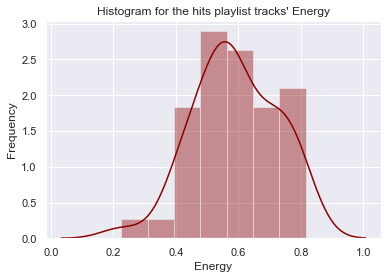

Modes = [84]
Mean = 86.55555555555556
Median = 86
Range = 25
Standard Deviation = 5.053296198436798


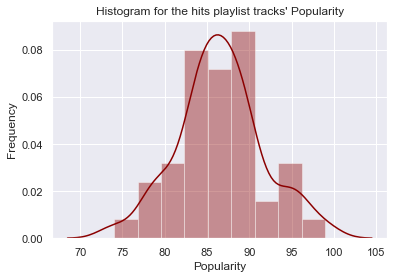

In [13]:
stats.statistician(hits.energy, "Histogram for the hits playlist tracks' Energy", "Energy")
stats.statistician(hits.popularity, "Histogram for the hits playlist tracks' Popularity", "Popularity")

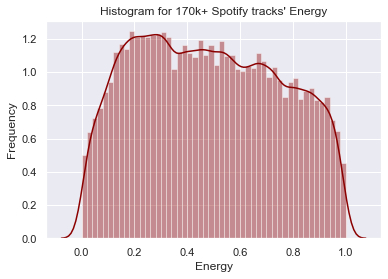

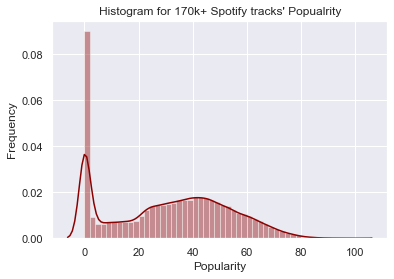

In [33]:
stats.hist_grapher(songstats.energy, "Histogram for 170k+ Spotify tracks' Energy", "Energy")
stats.hist_grapher(songstats.popularity, "Histogram for 170k+ Spotify tracks' Popualrity", "Popularity")

In [40]:
import statistics
print(songstats.energy.describe())
print(statistics.median(songstats.energy))
print(statistics.mode(songstats.energy))

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64


0.2

In [41]:
print(songstats.popularity.describe())
print(statistics.median(songstats.popularity))
print(statistics.mode(songstats.popularity))

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64
33
0
